# 6.7 USA Wildfires Dashboard Analysis & Data

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Checks
       - Missing values
       - Duplicate records
       - Data types
#### 3. Data Wrangling
       - Deriving new columns
           - Year & month
           - Fire size description
           - Fire cause category
           - Import US Regions
		- Drop Puerto Rico data (not a US State)
           - Import Monthly Average Temperatures
           - Import Annual Average Temperatures
       - Convert average monthly temperatures from Fahrenheit to Celsius
       - Rename average monthly temperature column
       
#### 4. Exploratory Data Analysis
       - Time series trend
       - Export data to .csv for Tableau use
       - Create recent data subset based on last 10 years
       - Bar graphs analysis
       - Create various subsets
       
 #### 5. Explore Data Correlations
       - Correlation matrix
       - Scatterplots
       - Pair Plots
       - Categorical Plots
     
#### 6. Regression Analysis
       - Data preparation
       - Regression analysis
       - Performance after removing outliers
       - Export data to .csv for Tableau use

#### 7. Machine Learning
       - Derive fire discovered day of week number column
       - Change derived column type to int64
       - Apply the elbow technique
       - K-means clustering
       - Scatterplot & Spatial plot analysis
       - Export data to .csv for Tableau use



### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
from matplotlib.ticker import FuncFormatter
import sklearn
from sklearn import tree, preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler

In [2]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path

path = r'/Users/faridchehraz/Desktop/Python/Master - USA Wildfires'

In [4]:
#Import ords_prods_merged_analysis_cat pkl file

df = pd.read_pickle(os.path.join(path, '2. Data', 'b. Prepared Data', 'US_wildfires.pkl'))

In [5]:
df.head()

,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,NWCG_GENERAL_CAUSE,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_NAME,DISC_MONTH,DISC_DOW
0,1,2005,2005-02-02,33,Power generation/transmission/distribution,0.10,A,40.036944,-121.005833,USFS,CA,63,Plumas County,2,Wednesday
1,2,2004,2004-05-12,133,Natural,0.25,A,38.933056,-120.404444,USFS,CA,61,Placer County,5,Wednesday
2,3,2004,2004-05-31,152,Debris and open burning,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17,El Dorado County,5,Monday
3,4,2004,2004-06-28,180,Natural,0.10,A,38.559167,-119.913333,USFS,CA,3,Alpine County,6,Monday
4,5,2004,2004-06-28,180,Natural,0.10,A,38.559167,-119.933056,USFS,CA,3,Alpine County,6,Monday


### 2. Data Checks

#### Missing values check

In [6]:
# Check for missing values

df.isnull().sum()

# Will not add missing county names

FOD_ID                     0
FIRE_YEAR                  0
DISCOVERY_DATE             0
DISCOVERY_DOY              0
NWCG_GENERAL_CAUSE         0
FIRE_SIZE                  0
FIRE_SIZE_CLASS            0
LATITUDE                   0
LONGITUDE                  0
OWNER_DESCR                0
STATE                      0
COUNTY                657235
FIPS_NAME             657236
DISC_MONTH                 0
DISC_DOW                   0
dtype: int64

#### Duplicate records check

In [7]:
# Check for duplicates

dups = df.duplicated()

In [8]:
dups.shape # No dups

(2166753,)

#### Data types check

In [9]:
df.dtypes #No changes necessary

FOD_ID                         int64
FIRE_YEAR                      int64
DISCOVERY_DATE        datetime64[ns]
DISCOVERY_DOY                  int64
NWCG_GENERAL_CAUSE            object
FIRE_SIZE                    float64
FIRE_SIZE_CLASS               object
LATITUDE                     float64
LONGITUDE                    float64
OWNER_DESCR                   object
STATE                         object
COUNTY                        object
FIPS_NAME                     object
DISC_MONTH                     int64
DISC_DOW                      object
dtype: object

### 3. Data Wrangling

#### Deriving new columns

#### Add year & month column from discovery date

In [10]:
# Extract Year & Month from DISCOVERY_DATE column

df['Year_Month'] = pd.to_datetime(df['DISCOVERY_DATE']).dt.strftime('%Y-%m')

In [11]:
# Change Year/Month column data type to datetime64

df['Year_Month'] = pd.to_datetime(df['Year_Month'])

#### Add Fire size description column

In [12]:
#If-statement with the loc() function to derive Fire_Size_Desc column

df.loc[df['FIRE_SIZE_CLASS'] == 'A', 'Fire_Size_Desc'] = '0.0 - 0.25 Acres'
df.loc[df['FIRE_SIZE_CLASS'] == 'B', 'Fire_Size_Desc'] = '0.26 - 9.9 Acres'
df.loc[df['FIRE_SIZE_CLASS'] == 'C', 'Fire_Size_Desc'] = '10.0 - 99.9 Acres'
df.loc[df['FIRE_SIZE_CLASS'] == 'D', 'Fire_Size_Desc'] = '100 - 299 Acres'
df.loc[df['FIRE_SIZE_CLASS'] == 'E', 'Fire_Size_Desc'] = '300 - 999 Acres'
df.loc[df['FIRE_SIZE_CLASS'] == 'F', 'Fire_Size_Desc'] = '1000 - 4999 Acres'
df.loc[df['FIRE_SIZE_CLASS'] == 'G', 'Fire_Size_Desc'] = '5000+ Acres'

In [13]:
df.head()

,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,NWCG_GENERAL_CAUSE,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_NAME,DISC_MONTH,DISC_DOW,Year_Month,Fire_Size_Desc
0,1,2005,2005-02-02,33,Power generation/transmission/distribution,0.10,A,40.036944,-121.005833,USFS,CA,63,Plumas County,2,Wednesday,2005-02-01,0.0 - 0.25 Acres
1,2,2004,2004-05-12,133,Natural,0.25,A,38.933056,-120.404444,USFS,CA,61,Placer County,5,Wednesday,2004-05-01,0.0 - 0.25 Acres
2,3,2004,2004-05-31,152,Debris and open burning,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17,El Dorado County,5,Monday,2004-05-01,0.0 - 0.25 Acres
3,4,2004,2004-06-28,180,Natural,0.10,A,38.559167,-119.913333,USFS,CA,3,Alpine County,6,Monday,2004-06-01,0.0 - 0.25 Acres
4,5,2004,2004-06-28,180,Natural,0.10,A,38.559167,-119.933056,USFS,CA,3,Alpine County,6,Monday,2004-06-01,0.0 - 0.25 Acres


#### Add Fire cause category column

In [14]:
#Categorise wildfire causes & add to dataframe

def Cause_category(row):

  if row['NWCG_GENERAL_CAUSE'] in ('Natural'):
    return 'Natural'
  elif row['NWCG_GENERAL_CAUSE'] in ('Debris and open burning','Firearms and explosives use',
                                     'Misuse of fire by a minor'):
    return 'Accidental'
  elif row['NWCG_GENERAL_CAUSE'] in ('Equipment and vehicle use','Power generation/transmission/distribution',
                                   'Railroad operations and maintenance'):
    return 'Accidental Industry'
  elif row['NWCG_GENERAL_CAUSE'] in ('Arson/incendiarism'):
    return 'Malicious'
  elif row['NWCG_GENERAL_CAUSE'] in ('Fireworks','Recreation and ceremony','Smoking'):
    return 'Recreation'
  elif row['NWCG_GENERAL_CAUSE'] in ('Other causes','Missing data/not specified/undetermined'):
    return 'Other/Unknown'

  else: return np.nan

df['Cause_cat'] = df.apply(Cause_category, axis=1)

#### Import US Regions and add column

In [15]:
#Create list of columns to import from US States_Regions csv file

vars_list = ['STATE','StateName','Region']

In [16]:
#Import products_checked csv file

df_states = pd.read_csv(os.path.join(path, '2. Data', 'b. Prepared Data', 'US States_Regions.csv'), index_col = False, usecols = vars_list)

In [17]:
df_states.shape

(52, 3)

In [18]:
df_states.head()

,STATE,StateName,Region
0,AK,Alaska,West
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [19]:
#Merge odrs_prods_comb and products_checked DFs

df = df.merge(df_states, on = ['STATE'], how = 'left', indicator = 'Check')

In [20]:
#Count merged DF match types

df['Check'].value_counts()

both          2144594
left_only       22159
right_only          0
Name: Check, dtype: int64

In [21]:
#Check where merge was not successful

df_check = df.loc[df['Check'] == 'left_only']

In [22]:
#Check states which did not merge - Puerto Rico

df_check['STATE'].value_counts(dropna=False)

PR    22159
Name: STATE, dtype: int64

In [23]:
#Drop Puerto Rico as it's not a US State

df = df[df.STATE != 'PR']

#### Import Average Monthly US Temperatures and add column

In [24]:
#Create list of columns to import from US Average Temperature csv file

vars_list_temp = ['Date','Value']

In [25]:
#Import products_checked csv file

df_temp = pd.read_csv(os.path.join(path, '2. Data', 'a. Original Data', 'Avg USA Temperatures 1992-2018.csv'), index_col = False, usecols = vars_list_temp)

In [26]:
df_temp.head()

,Date,Value
0,199201,33.62
1,199202,39.70
2,199203,44.71
3,199204,52.54
4,199205,61.16


In [27]:
df_temp.dtypes

Date       int64
Value    float64
dtype: object

In [28]:
df_temp['Date'] = pd.to_datetime(df_temp['Date'].astype(str), format='%Y%m')

In [29]:
df_temp

,Date,Value
0,1992-01-01,33.62
1,1992-02-01,39.70
2,1992-03-01,44.71
3,1992-04-01,52.54
4,1992-05-01,61.16
...,...,...
319,2018-08-01,73.51
320,2018-09-01,67.53
321,2018-10-01,53.71
322,2018-11-01,40.01


In [30]:
#Rename columns

df_temp=df_temp.rename(columns = {'Date':'Year_Month'})
df_temp=df_temp.rename(columns = {'Value':'Temperature'})

In [31]:
df_temp.head()

,Year_Month,Temperature
0,1992-01-01,33.62
1,1992-02-01,39.70
2,1992-03-01,44.71
3,1992-04-01,52.54
4,1992-05-01,61.16


In [32]:
#Merge odrs_prods_comb and products_checked DFs

df = df.merge(df_temp, on = ['Year_Month'], how = 'left', indicator = 'Check2')

In [33]:
#Count merged DF match types

df['Check2'].value_counts()

both          2144594
left_only           0
right_only          0
Name: Check2, dtype: int64

In [35]:
#Rename Temperature column

df=df.rename(columns = {'Temperature':'Avg Monthly Temp'})

In [36]:
df.head()

,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,NWCG_GENERAL_CAUSE,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,...,DISC_MONTH,DISC_DOW,Year_Month,Fire_Size_Desc,Cause_cat,StateName,Region,Check,Avg Monthly Temp,Check2
0,1,2005,2005-02-02,33,Power generation/transmission/distribution,0.10,A,40.036944,-121.005833,USFS,...,2,Wednesday,2005-02-01,0.0 - 0.25 Acres,Accidental Industry,California,West,both,37.94,both
1,2,2004,2004-05-12,133,Natural,0.25,A,38.933056,-120.404444,USFS,...,5,Wednesday,2004-05-01,0.0 - 0.25 Acres,Natural,California,West,both,61.92,both
2,3,2004,2004-05-31,152,Debris and open burning,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,...,5,Monday,2004-05-01,0.0 - 0.25 Acres,Accidental,California,West,both,61.92,both
3,4,2004,2004-06-28,180,Natural,0.10,A,38.559167,-119.913333,USFS,...,6,Monday,2004-06-01,0.0 - 0.25 Acres,Natural,California,West,both,68.09,both
4,5,2004,2004-06-28,180,Natural,0.10,A,38.559167,-119.933056,USFS,...,6,Monday,2004-06-01,0.0 - 0.25 Acres,Natural,California,West,both,68.09,both


#### Import Average Annual US Temperatures and add column

In [37]:
#Create list of columns to import from US Average Temperature csv file

vars_list_temp_ann = ['FIRE_YEAR','Avg Temperature']

In [38]:
#Import products_checked csv file

df_temp_ann = pd.read_csv(os.path.join(path, '2. Data', 'a. Original Data', 'Avg annual Temperatures 1992-2018.csv'), index_col = False, usecols = vars_list_temp_ann)

In [39]:
df_temp_ann.shape

(27, 2)

In [40]:
df_temp_ann.dtypes

FIRE_YEAR            int64
Avg Temperature    float64
dtype: object

In [41]:
#Merge odrs_prods_comb and products_checked DFs

df = df.merge(df_temp_ann, on = ['FIRE_YEAR'], how = 'left', indicator = 'Check3')

In [42]:
#Count merged DF match types

df['Check3'].value_counts()

both          2144594
left_only           0
right_only          0
Name: Check3, dtype: int64

In [43]:
df.head()

,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,NWCG_GENERAL_CAUSE,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,...,Year_Month,Fire_Size_Desc,Cause_cat,StateName,Region,Check,Avg Monthly Temp,Check2,Avg Temperature,Check3
0,1,2005,2005-02-02,33,Power generation/transmission/distribution,0.10,A,40.036944,-121.005833,USFS,...,2005-02-01,0.0 - 0.25 Acres,Accidental Industry,California,West,both,37.94,both,14.777778,both
1,2,2004,2004-05-12,133,Natural,0.25,A,38.933056,-120.404444,USFS,...,2004-05-01,0.0 - 0.25 Acres,Natural,California,West,both,61.92,both,14.944444,both
2,3,2004,2004-05-31,152,Debris and open burning,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,...,2004-05-01,0.0 - 0.25 Acres,Accidental,California,West,both,61.92,both,14.944444,both
3,4,2004,2004-06-28,180,Natural,0.10,A,38.559167,-119.913333,USFS,...,2004-06-01,0.0 - 0.25 Acres,Natural,California,West,both,68.09,both,14.944444,both
4,5,2004,2004-06-28,180,Natural,0.10,A,38.559167,-119.933056,USFS,...,2004-06-01,0.0 - 0.25 Acres,Natural,California,West,both,68.09,both,14.944444,both


In [45]:
#Convert Average Monthly Temperatures from Farenheit to Celcius

df['Avg Monthly Temp'] = (df['Avg Monthly Temp']-32) * (5/9)

In [46]:
df.head()

,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,NWCG_GENERAL_CAUSE,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,...,Year_Month,Fire_Size_Desc,Cause_cat,StateName,Region,Check,Avg Monthly Temp,Check2,Avg Temperature,Check3
0,1,2005,2005-02-02,33,Power generation/transmission/distribution,0.10,A,40.036944,-121.005833,USFS,...,2005-02-01,0.0 - 0.25 Acres,Accidental Industry,California,West,both,3.300000,both,14.777778,both
1,2,2004,2004-05-12,133,Natural,0.25,A,38.933056,-120.404444,USFS,...,2004-05-01,0.0 - 0.25 Acres,Natural,California,West,both,16.622222,both,14.944444,both
2,3,2004,2004-05-31,152,Debris and open burning,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,...,2004-05-01,0.0 - 0.25 Acres,Accidental,California,West,both,16.622222,both,14.944444,both
3,4,2004,2004-06-28,180,Natural,0.10,A,38.559167,-119.913333,USFS,...,2004-06-01,0.0 - 0.25 Acres,Natural,California,West,both,20.050000,both,14.944444,both
4,5,2004,2004-06-28,180,Natural,0.10,A,38.559167,-119.933056,USFS,...,2004-06-01,0.0 - 0.25 Acres,Natural,California,West,both,20.050000,both,14.944444,both


### 4. Exploratory Data Analysis

#### Time series trend

Text(0.5, 0, 'Year')

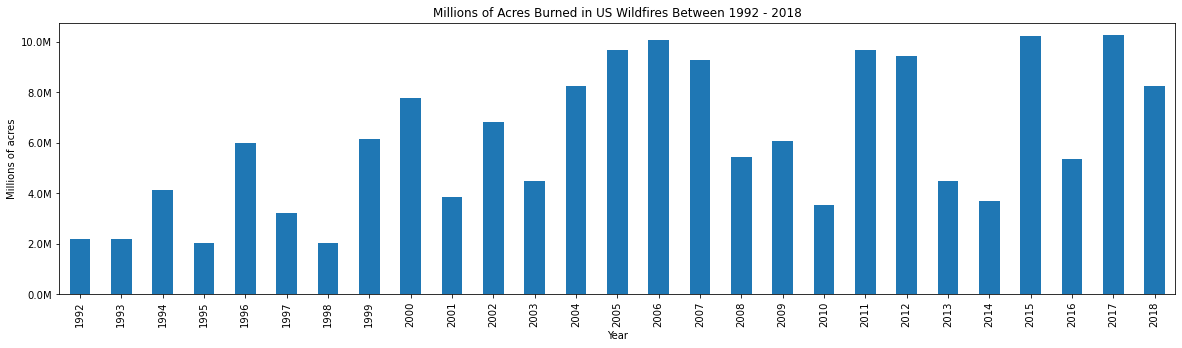

In [47]:
#Graph Acres burned between 1992 - 2018

plt.rcParams["figure.figsize"] = (20,5)

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)
formatter = FuncFormatter(millions)
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)

Fire_Area_Trend = df.groupby(['FIRE_YEAR'])['FIRE_SIZE'].agg('sum').plot.bar()

Fire_Area_Trend.set_title('Millions of Acres Burned in US Wildfires Between 1992 - 2018')
Fire_Area_Trend.set_ylabel('Millions of acres')
Fire_Area_Trend.set_xlabel('Year')

#### Export data to .csv for Tableau use

In [49]:
#Export fire_trend_sum to .csv file

fire_trend_sum = df.groupby(['Year_Month','STATE','Region','Cause_cat','Avg Monthly Temp','Fire_Size_Desc'])['FIRE_SIZE'].agg('sum')
fire_trend_sum.to_csv(os.path.join(path, '2. Data', 'b. Prepared Data', 'fire_trend_sum.csv'))

In [50]:
#Export fire_trend_count to .csv file

fire_trend_count = df.groupby(['Year_Month','STATE','Region','Cause_cat','Avg Monthly Temp','Fire_Size_Desc'])['FIRE_SIZE'].agg('count')
fire_trend_count.to_csv(os.path.join(path, '2. Data', 'b. Prepared Data', 'fire_trend_count.csv'))

In [51]:
#Export agg_fire_trend_sum to .csv file

agg_fire_trend_sum = df.groupby(['FIRE_YEAR','Avg Temperature'])['FIRE_SIZE'].agg('sum')
agg_fire_trend_sum.to_csv(os.path.join(path, '2. Data', 'b. Prepared Data', 'agg_fire_trend_sum.csv'))

#### Create recent data subset based on last 10 years

In [52]:
#Create subset based on 2009 - 2018 data

df_recent = df[df['FIRE_YEAR'] > 2008]

#### Bar Graphs Analysis

Graph count of summarised causes for the period 2004 - 2018

/var/folders/vh/d2rsnjw92ql_ggn35h8q4vmr0000gn/T/ipykernel_12734/221157953.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  Fire_Area_Cause_Count.set_yticklabels(['{:,}'.format(int(x)) for x in Fire_Area_Cause_Count.get_yticks().tolist()])


Text(0.5, 0, 'Summary Cause')

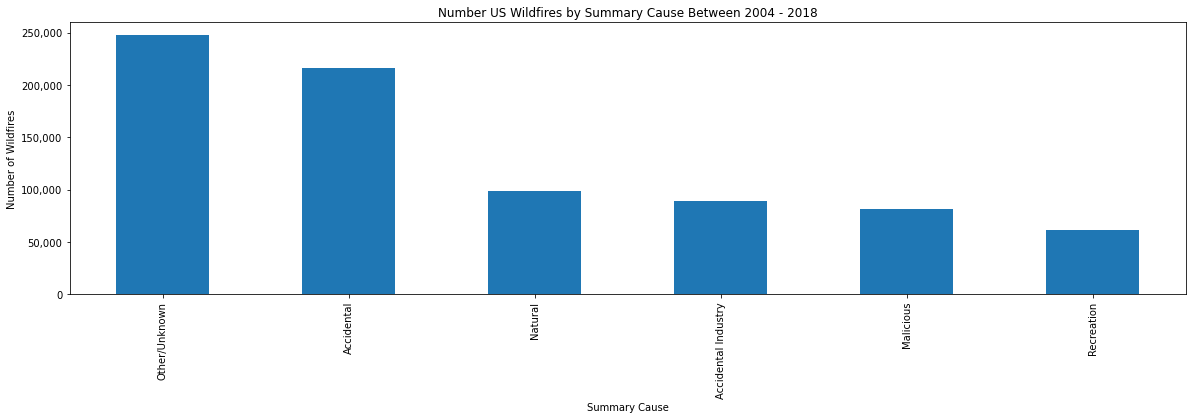

In [53]:
#Graph count of summarised causes for the period 2004 - 2018

plt.rcParams["figure.figsize"] = (20,5)

Fire_Area_Cause_Count = df_recent.groupby(['Cause_cat'])['FIRE_SIZE'].agg('count').sort_values(ascending=False).plot.bar()

Fire_Area_Cause_Count.set_yticklabels(['{:,}'.format(int(x)) for x in Fire_Area_Cause_Count.get_yticks().tolist()])

Fire_Area_Cause_Count.set_title('Number US Wildfires by Summary Cause Between 2004 - 2018')
Fire_Area_Cause_Count.set_ylabel('Number of Wildfires')
Fire_Area_Cause_Count.set_xlabel('Summary Cause')

Graph Area burned between 1992 - 2018 by summary cause

Text(0.5, 0, 'Summary Category')

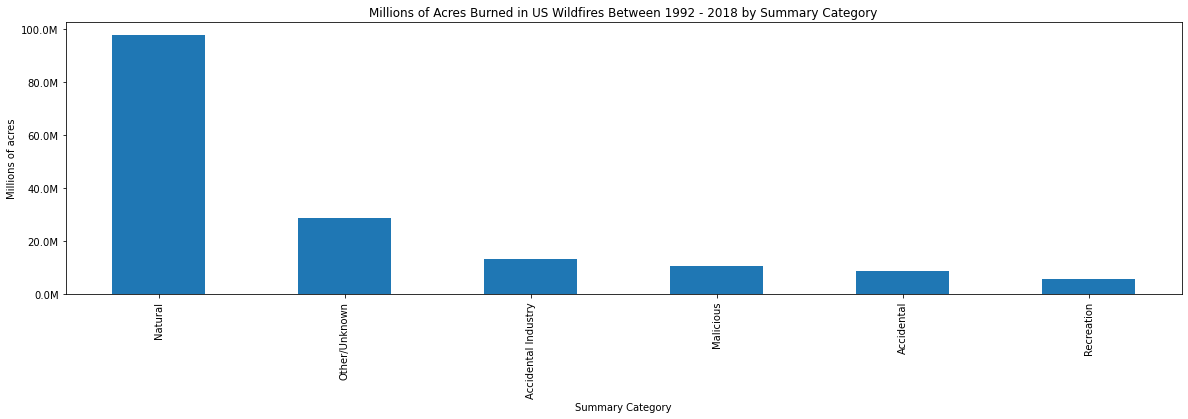

In [54]:
#Graph Area burned between 1992 - 2018 by summary cause

plt.rcParams["figure.figsize"] = (20,5)

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)
formatter = FuncFormatter(millions)
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)

Fire_Area_Cause_Sum = df.groupby(['Cause_cat'])['FIRE_SIZE'].agg('sum').sort_values(ascending=False).plot.bar()

Fire_Area_Cause_Sum.set_title('Millions of Acres Burned in US Wildfires Between 1992 - 2018 by Summary Category')
Fire_Area_Cause_Sum.set_ylabel('Millions of acres')
Fire_Area_Cause_Sum.set_xlabel('Summary Category')

Sum of acres burned by state

In [55]:
#Sum of acres burned by state

fire_sum_states = df.groupby(['STATE'])['FIRE_SIZE'].agg('sum').sort_values(ascending=False).head(5)
pd.options.display.float_format = '{:,.0f}'.format
fire_sum_states

STATE
AK   33,801,113
CA   16,378,886
ID   15,347,320
NV   11,517,853
TX   11,433,879
Name: FIRE_SIZE, dtype: float64

Count of wildfires by state

In [56]:
#Count of wildfires by state

fire_count_states = df.groupby(['STATE'])['FIRE_SIZE'].agg('count').sort_values(ascending=False).head(5)
pd.options.display.float_format = '{:,.0f}'.format
fire_count_states

STATE
CA    235229
GA    180175
TX    167061
NC    123793
FL     99356
Name: FIRE_SIZE, dtype: int64

In [57]:
#Count of cause categories

df['Cause_cat'].value_counts(dropna=False)

Accidental             574015
Other/Unknown          535286
Natural                312805
Malicious              310165
Accidental Industry    240706
Recreation             171617
Name: Cause_cat, dtype: int64

In [58]:
#Count of fire size descriptions

df['Fire_Size_Desc'].value_counts(dropna=False)

0.26 - 9.9 Acres     1030075
0.0 - 0.25 Acres      808986
10.0 - 99.9 Acres     243699
100 - 299 Acres        32111
300 - 999 Acres        16180
1000 - 4999 Acres       9088
5000+ Acres             4455
Name: Fire_Size_Desc, dtype: int64

#### Create various subsets

In [79]:
#Accidental Industrial causes subsuet
df_Acc_Ind = df[df['Cause_cat']=='Accidental Industry']

#Other/Unknown cause subset
df_Other_Uknown = df[df['Cause_cat']=='Other/Unknown']

#Natural cause subset
df_Natural = df[df['Cause_cat']=='Natural']

#Malicious cauases subset
df_Malicious = df[df['Cause_cat']=='Malicious']

#Accidental causes subset
df_Accidental = df[df['Cause_cat']=='Accidental']

#Recreational cause subset
df_Recreation = df[df['Cause_cat']=='Recreation']

#State of Arkansas subset
df_AK = df[df['STATE']=='AK']

#State of California subset
df_CA = df[df['STATE']=='CA']

#Largest wildfires subset
df_large_fires = df[df['FIRE_SIZE_CLASS'].isin(['G'])]

#Largest 5 wildfires categories subset
df_large_fires_cats = df[df['FIRE_SIZE_CLASS'].isin(['F','G'])]

In [60]:
df_large_fires.shape

(4455, 25)

### 5. Explore Data Correlations

#### Correlation matrix

In [61]:
# Create a correlation matrix using pandas

pd.options.display.float_format = '{:,.4f}'.format
df_large_fires.corr()

,FOD_ID,FIRE_YEAR,DISCOVERY_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,DISC_MONTH,Avg Monthly Temp,Avg Temperature
FOD_ID,1.0000,0.8092,-0.0466,0.0024,-0.0335,0.0147,-0.0457,-0.0200,0.4239
FIRE_YEAR,0.8092,1.0000,-0.0719,0.0452,0.0298,-0.0264,-0.0711,0.0020,0.3592
DISCOVERY_DOY,-0.0466,-0.0719,1.0000,-0.0242,0.1179,-0.1362,0.9878,0.4973,-0.0206
FIRE_SIZE,0.0024,0.0452,-0.0242,1.0000,0.1578,-0.1566,-0.0240,0.0410,0.0239
LATITUDE,-0.0335,0.0298,0.1179,0.1578,1.0000,-0.8486,0.1111,0.3259,-0.0324
LONGITUDE,0.0147,-0.0264,-0.1362,-0.1566,-0.8486,1.0000,-0.1270,-0.3714,0.0231
DISC_MONTH,-0.0457,-0.0711,0.9878,-0.0240,0.1111,-0.1270,1.0000,0.5010,-0.0199
Avg Monthly Temp,-0.0200,0.0020,0.4973,0.0410,0.3259,-0.3714,0.5010,1.0000,0.0121
Avg Temperature,0.4239,0.3592,-0.0206,0.0239,-0.0324,0.0231,-0.0199,0.0121,1.0000


#### Create a correlation heatmap using seaborn:

In [62]:
df_large_fires.columns

Index(['FOD_ID', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'NWCG_GENERAL_CAUSE', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_DESCR', 'STATE', 'COUNTY', 'FIPS_NAME',
       'DISC_MONTH', 'DISC_DOW', 'Year_Month', 'Fire_Size_Desc', 'Cause_cat',
       'StateName', 'Region', 'Check', 'Avg Monthly Temp', 'Check2',
       'Avg Temperature', 'Check3'],
      dtype='object')

In [63]:
# Create a subset excluding the "FOD_ID", "DISCOVERY_DATE", 'FIRE_SIZE_CLASS',
#'COUNTY', 'FIPS_NAME' columns

sub = df_large_fires[['FIRE_YEAR', 'DISCOVERY_DOY', 'LATITUDE','LONGITUDE', 'OWNER_DESCR', 'STATE',
       'DISC_MONTH', 'DISC_DOW','FIRE_SIZE', 'Fire_Size_Desc','Year_Month','Avg Monthly Temp','Avg Temperature']]

In [64]:
sub

,FIRE_YEAR,DISCOVERY_DOY,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,DISC_MONTH,DISC_DOW,FIRE_SIZE,Fire_Size_Desc,Year_Month,Avg Monthly Temp,Avg Temperature
16,2004,280,38.5233,-120.2117,USFS,CA,10,Wednesday,"16,823.0000",5000+ Acres,2004-10-01,12.9778,14.9444
17,2004,287,38.7800,-120.2600,USFS,CA,10,Wednesday,"7,700.0000",5000+ Acres,2004-10-01,12.9778,14.9444
188,2005,172,33.7233,-111.2750,USFS,AZ,6,Tuesday,"16,100.0000",5000+ Acres,2005-06-01,20.6722,14.7778
1505,2005,149,33.6133,-108.5589,USFS,NM,5,Sunday,"11,936.0000",5000+ Acres,2005-05-01,15.3111,14.7778
1588,2005,188,38.1697,-105.0381,USFS,CO,7,Thursday,"11,357.0000",5000+ Acres,2005-07-01,24.0611,14.7778
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123364,2011,157,38.5307,-105.5005,MISSING/NOT SPECIFIED,CO,6,Monday,"5,000.0000",5000+ Acres,2011-06-01,21.0111,14.1111
2125743,2011,158,38.7180,-104.8187,MISSING/NOT SPECIFIED,CO,6,Tuesday,"11,489.0000",5000+ Acres,2011-06-01,21.0111,14.1111
2128528,2011,225,39.6685,-105.0888,MISSING/NOT SPECIFIED,CO,8,Saturday,"5,200.0000",5000+ Acres,2011-08-01,23.8889,14.1111
2136456,2015,261,40.3920,-104.5784,PRIVATE,CO,9,Friday,"12,699.0000",5000+ Acres,2015-09-01,20.3000,16.0000


In [65]:
#Convert quantitative variables to numerical values

le = preprocessing.LabelEncoder()
sub['STATE'] = le.fit_transform(df_large_fires['STATE'])
sub['DISC_DOW'] = le.fit_transform(df_large_fires['DISC_DOW'])
sub['Fire_Size_Desc'] = le.fit_transform(df_large_fires['Fire_Size_Desc'])
sub['OWNER_DESCR'] = le.fit_transform(df_large_fires['OWNER_DESCR'])

print(sub.head())

      FIRE_YEAR  DISCOVERY_DOY  LATITUDE  LONGITUDE  OWNER_DESCR  STATE  \
16         2004            280   38.5233  -120.2117           14      3   
17         2004            287   38.7800  -120.2600           14      3   
188        2005            172   33.7233  -111.2750           14      2   
1505       2005            149   33.6133  -108.5589           14     20   
1588       2005            188   38.1697  -105.0381           14      4   

      DISC_MONTH  DISC_DOW   FIRE_SIZE  Fire_Size_Desc Year_Month  \
16            10         6 16,823.0000               0 2004-10-01   
17            10         6  7,700.0000               0 2004-10-01   
188            6         5 16,100.0000               0 2005-06-01   
1505           5         3 11,936.0000               0 2005-05-01   
1588           7         4 11,357.0000               0 2005-07-01   

      Avg Monthly Temp  Avg Temperature  
16             12.9778          14.9444  
17             12.9778          14.9444  
188     

/var/folders/vh/d2rsnjw92ql_ggn35h8q4vmr0000gn/T/ipykernel_12734/2167034849.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['STATE'] = le.fit_transform(df_large_fires['STATE'])
/var/folders/vh/d2rsnjw92ql_ggn35h8q4vmr0000gn/T/ipykernel_12734/2167034849.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['DISC_DOW'] = le.fit_transform(df_large_fires['DISC_DOW'])
/var/folders/vh/d2rsnjw92ql_ggn35h8q4vmr0000gn/T/ipykernel_12734/2167034849.py:6: SettingWithCopyWarning: 
A value is trying to be set o

In [66]:
sub

,FIRE_YEAR,DISCOVERY_DOY,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,DISC_MONTH,DISC_DOW,FIRE_SIZE,Fire_Size_Desc,Year_Month,Avg Monthly Temp,Avg Temperature
16,2004,280,38.5233,-120.2117,14,3,10,6,"16,823.0000",0,2004-10-01,12.9778,14.9444
17,2004,287,38.7800,-120.2600,14,3,10,6,"7,700.0000",0,2004-10-01,12.9778,14.9444
188,2005,172,33.7233,-111.2750,14,2,6,5,"16,100.0000",0,2005-06-01,20.6722,14.7778
1505,2005,149,33.6133,-108.5589,14,20,5,3,"11,936.0000",0,2005-05-01,15.3111,14.7778
1588,2005,188,38.1697,-105.0381,14,4,7,4,"11,357.0000",0,2005-07-01,24.0611,14.7778
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123364,2011,157,38.5307,-105.5005,5,4,6,1,"5,000.0000",0,2011-06-01,21.0111,14.1111
2125743,2011,158,38.7180,-104.8187,5,4,6,5,"11,489.0000",0,2011-06-01,21.0111,14.1111
2128528,2011,225,39.6685,-105.0888,5,4,8,2,"5,200.0000",0,2011-08-01,23.8889,14.1111
2136456,2015,261,40.3920,-104.5784,9,4,9,0,"12,699.0000",0,2015-09-01,20.3000,16.0000


In [67]:
sub.dtypes

FIRE_YEAR                    int64
DISCOVERY_DOY                int64
LATITUDE                   float64
LONGITUDE                  float64
OWNER_DESCR                  int64
STATE                        int64
DISC_MONTH                   int64
DISC_DOW                     int64
FIRE_SIZE                  float64
Fire_Size_Desc               int64
Year_Month          datetime64[ns]
Avg Monthly Temp           float64
Avg Temperature            float64
dtype: object

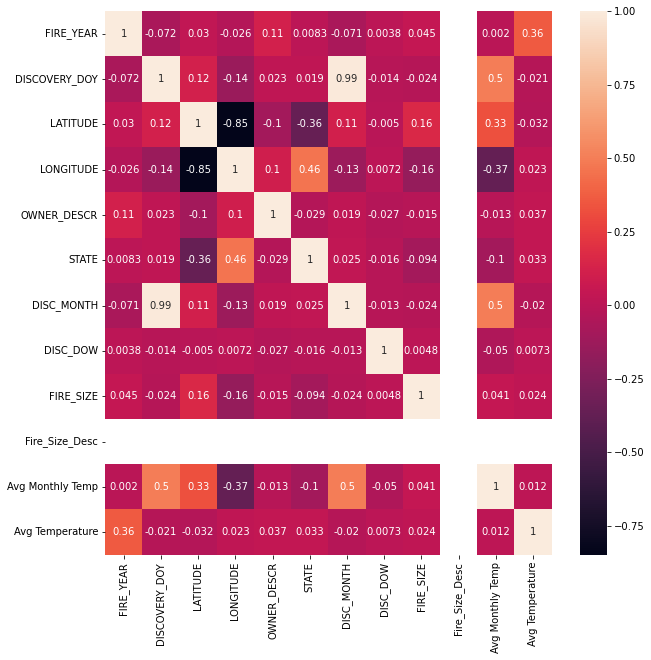

In [68]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

#### Correlation Observations:

   - Some expected correlations relating to average temperatures and month of discovery etc.

#### Scatterplots

In [69]:
df_large_fires.head()

,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,NWCG_GENERAL_CAUSE,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,...,Year_Month,Fire_Size_Desc,Cause_cat,StateName,Region,Check,Avg Monthly Temp,Check2,Avg Temperature,Check3
16,17,2004,2004-10-06,280,Equipment and vehicle use,"16,823.0000",G,38.5233,-120.2117,USFS,...,2004-10-01,5000+ Acres,Accidental Industry,California,West,both,12.9778,both,14.9444,both
17,18,2004,2004-10-13,287,Power generation/transmission/distribution,"7,700.0000",G,38.7800,-120.2600,USFS,...,2004-10-01,5000+ Acres,Accidental Industry,California,West,both,12.9778,both,14.9444,both
188,192,2005,2005-06-21,172,Natural,"16,100.0000",G,33.7233,-111.2750,USFS,...,2005-06-01,5000+ Acres,Natural,Arizona,West,both,20.6722,both,14.7778,both
1505,1520,2005,2005-05-29,149,Natural,"11,936.0000",G,33.6133,-108.5589,USFS,...,2005-05-01,5000+ Acres,Natural,New Mexico,West,both,15.3111,both,14.7778,both
1588,1603,2005,2005-07-07,188,Natural,"11,357.0000",G,38.1697,-105.0381,USFS,...,2005-07-01,5000+ Acres,Natural,Colorado,West,both,24.0611,both,14.7778,both


In [70]:
#agg_fire_trend_sum = agg_fire_trend_sum.reset_index()

In [71]:
#agg_fire_trend_sum['FIRE_YEAR'] = agg_fire_trend_sum.index

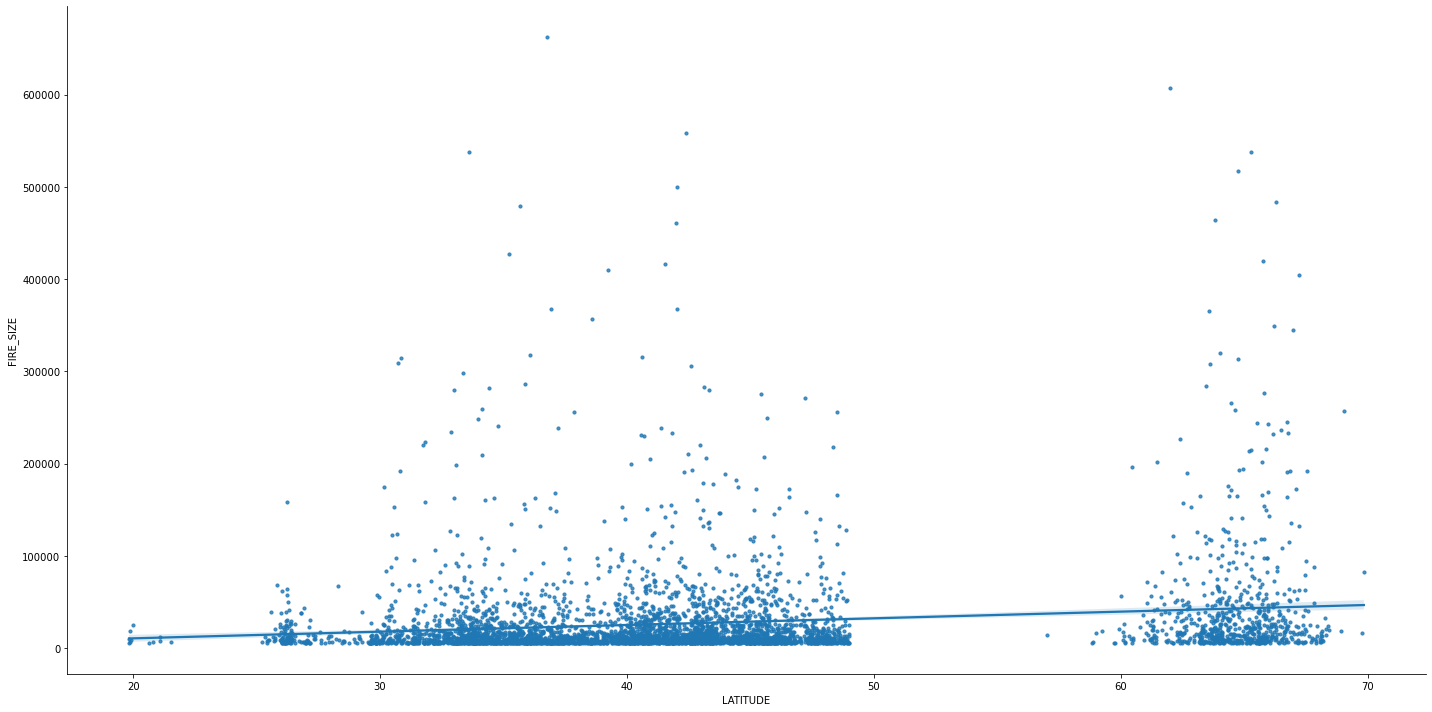

In [72]:
# Create a scatterplot for the "STATE" and "LATITUDE" columns in seaborn

sns.lmplot(x = 'LATITUDE', y = 'FIRE_SIZE', data = df_large_fires, height = 10, aspect = 2, scatter_kws={"s": 10})

The scatter plot shows a weak correlation between "DISC_MONTH" and "LATITUDE".
It would be intersting to see the scatter plot with a smaller sample of the data.

#### Pair Plots

In [74]:
# Keep only the variables you want to use in the pair plot

sub_2 = sub[['DISCOVERY_DOY', 'STATE',
       'DISC_MONTH', 'DISC_DOW', 'Fire_Size_Desc','Avg Monthly Temp','Avg Temperature']]

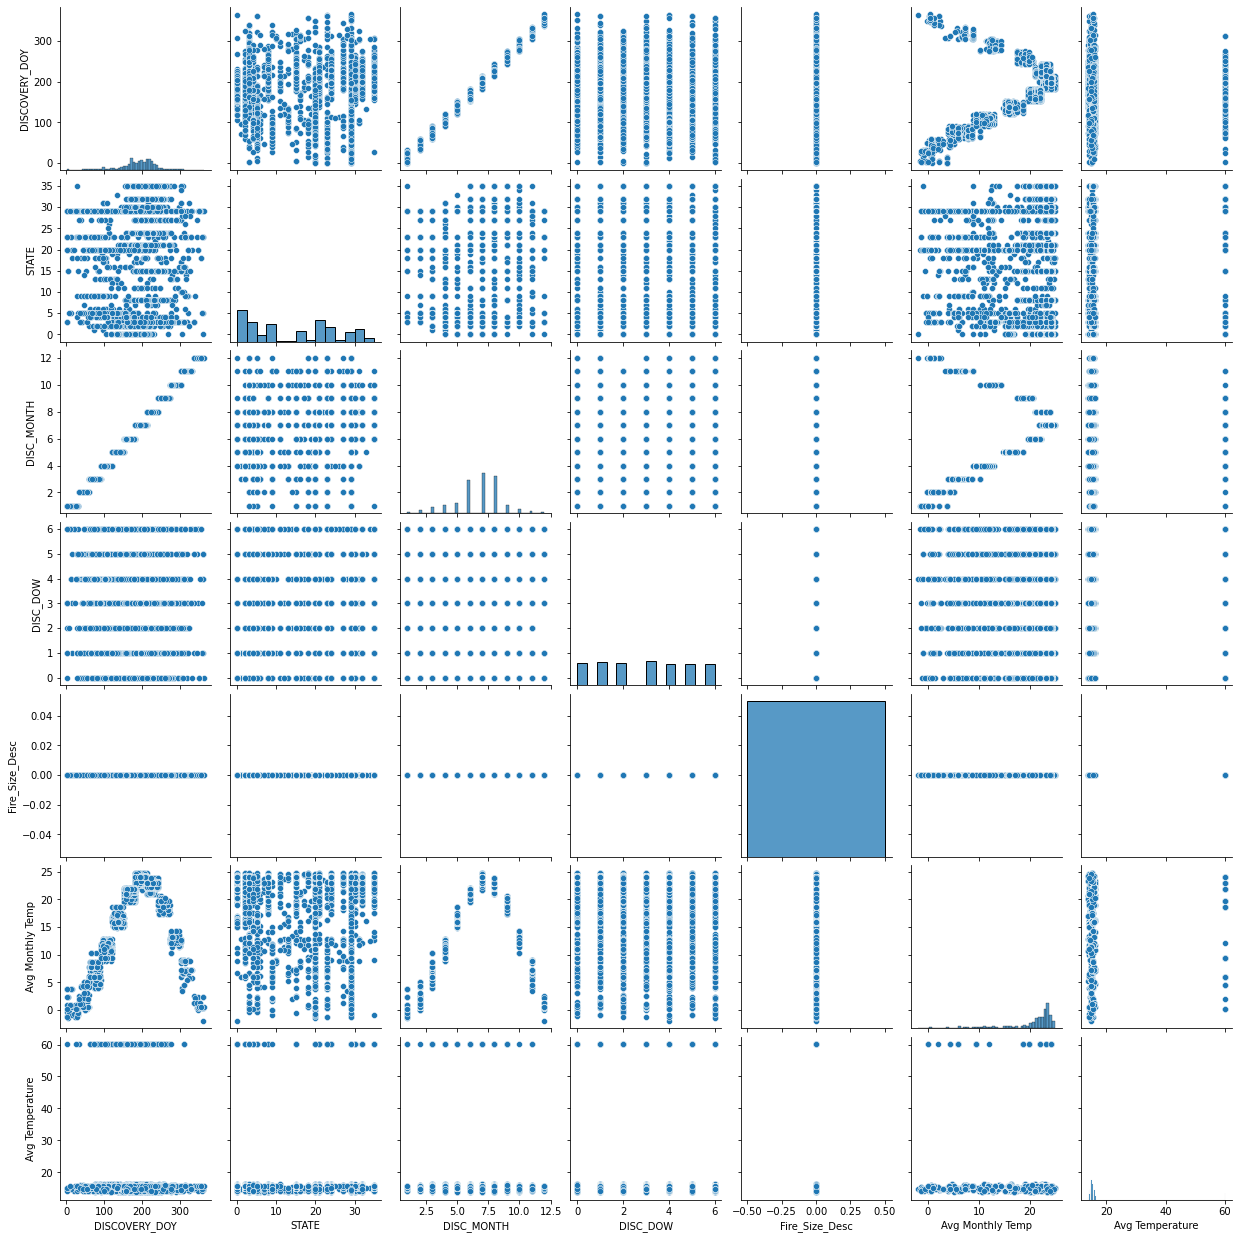

In [75]:
# Create a pair plot 

g = sns.pairplot(sub_2)
plt.rcParams['figure.figsize']=(10,10)

#### Categorical Plots

Create a categorical plot looking at Cause, Latitude and Fire Size for the two largest fire size categories

Text(27.318530208333335, 0.5, 'Latitude')

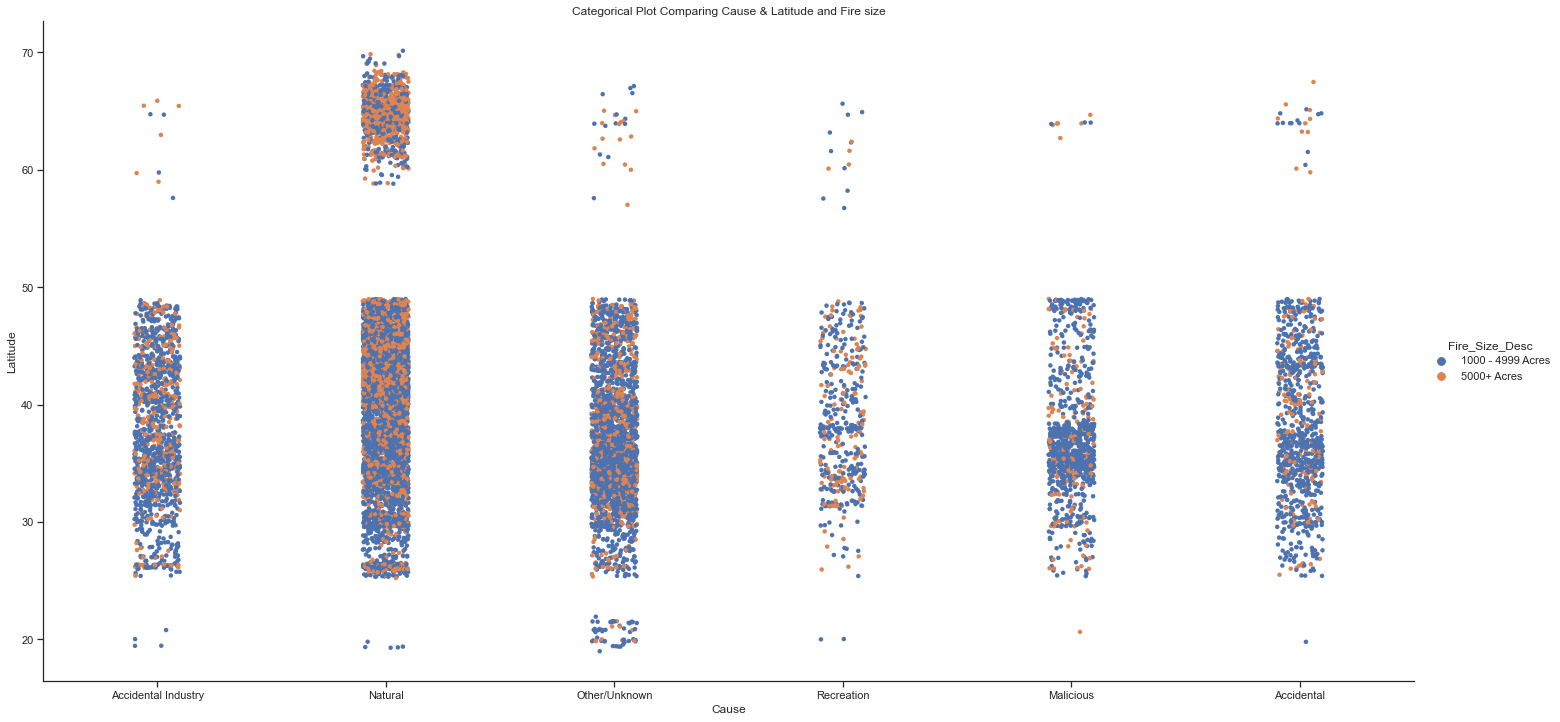

In [80]:
#Create a categorical plot looking at Cause, Latitude and Fire Size for the  two largest fire size categories 

sns.set(style='ticks')
cat_plot = sns.catplot(x = 'Cause_cat', y = 'LATITUDE', data = df_large_fires_cats, hue = 'Fire_Size_Desc', hue_order = ['1000 - 4999 Acres','5000+ Acres'],height=10, aspect=2, sizes=(20, 20))

plt.title('Categorical Plot Comparing Cause & Latitude and Fire size')
plt.xlabel('Cause')
plt.ylabel('Latitude')

### 6. Regression analysis

In [81]:
# This option ensures that the graphs created are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

#### Data preparation for regression analysis

##### Hypothesis:

The higher north in the US you go i.e., the higher the latitude, the larger the number of largest category wildfires there are

#### Checking extreme values

/Users/faridchehraz/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LATITUDE', ylabel='Density'>

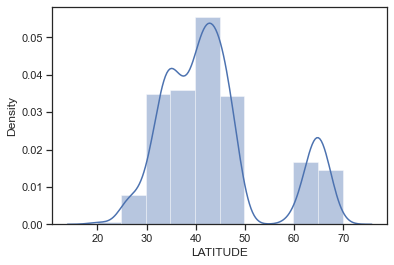

In [82]:
# Checking for extreme values in "Latitude"

sns.distplot(df_large_fires['LATITUDE'], bins=10)

/Users/faridchehraz/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FIRE_SIZE', ylabel='Density'>

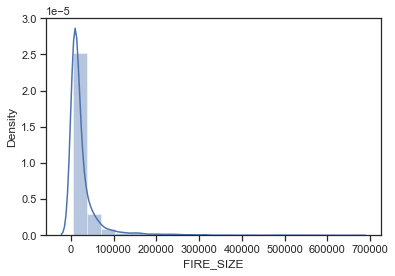

In [83]:
# Checking for extreme values in "Fire Size"

sns.distplot(df_large_fires['FIRE_SIZE'], bins=20)

In [84]:
# Checking the mean, median and max values

df_large_fires[['LATITUDE', 'FIRE_SIZE']].describe()

,LATITUDE,FIRE_SIZE
count,"4,455.0000","4,455.0000"
mean,43.3452,"27,449.9928"
std,10.6040,"48,631.0590"
min,19.8305,"5,000.0000"
25%,35.7522,"7,151.5000"
50%,41.7019,"12,084.0000"
75%,46.1110,"25,777.5500"
max,69.8495,"662,700.0000"


Extreme values identified in the fire size data were not deleted based on the assumption that they are correct

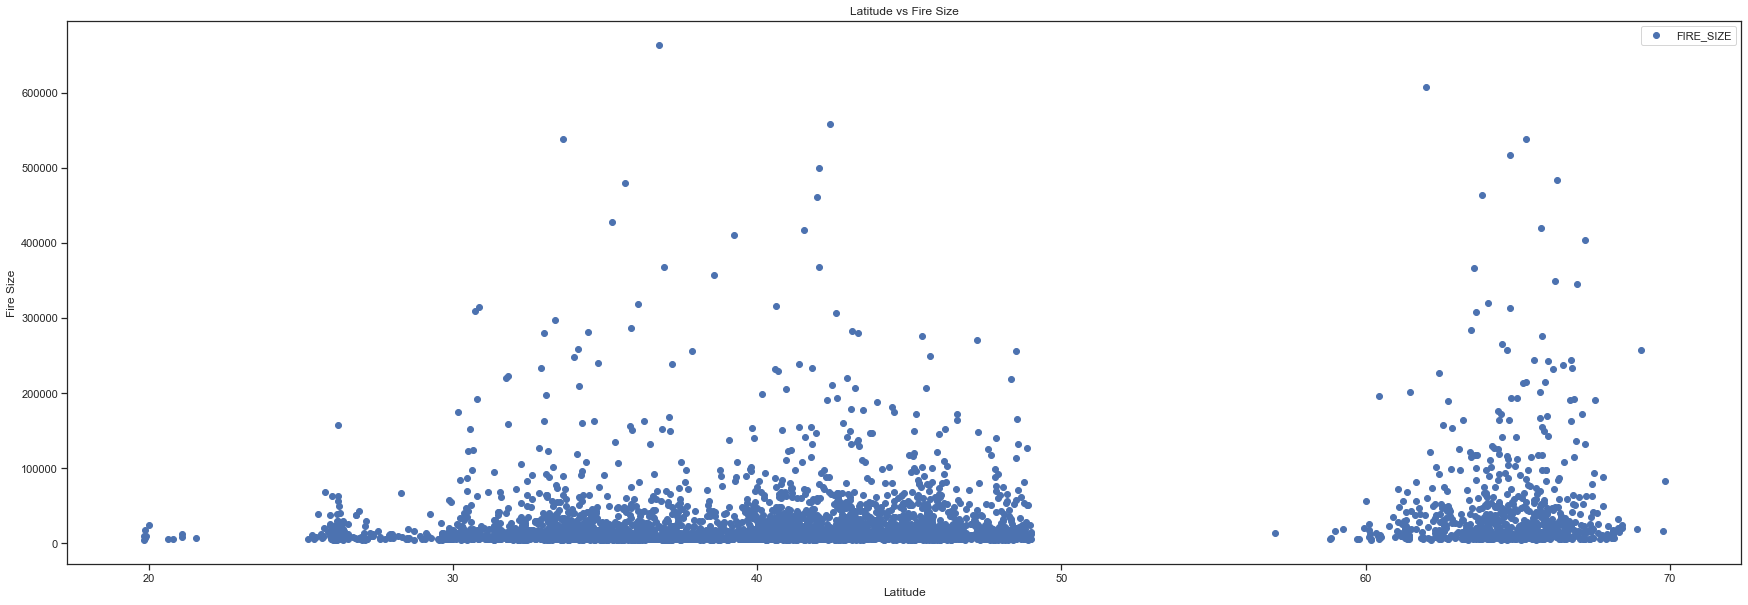

In [86]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_large_fires.plot(x = 'LATITUDE', y='FIRE_SIZE',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Latitude vs Fire Size')
plt.xlabel('Latitude')  
plt.ylabel('Fire Size')

#specify x-axis locations
#x_ticks = [20, 40, 60, 80, 100, 120]

#specify x-axis labels
#x_labels = ['Accidental Industry', 'Other/Unknown', 'Recreation', 'Natural', 'Accidental', 'Malicious'] 

#add x-axis values to plot
#plt.xticks(ticks=x_ticks, labels=x_labels)

plt.rcParams["figure.figsize"] = (30,10)
#plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

plt.show()

In [87]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_large_fires['LATITUDE'].values.reshape(-1,1)
y = df_large_fires['FIRE_SIZE'].values.reshape(-1,1)

In [88]:
X

array([[38.52333333],
       [38.78      ],
       [33.72333333],
       ...,
       [39.668527  ],
       [40.392     ],
       [30.4791667 ]])

In [89]:
y

array([[16823.],
       [ 7700.],
       [16100.],
       ...,
       [ 5200.],
       [12699.],
       [ 7500.]])

In [90]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Regression analysis

In [91]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [92]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [93]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

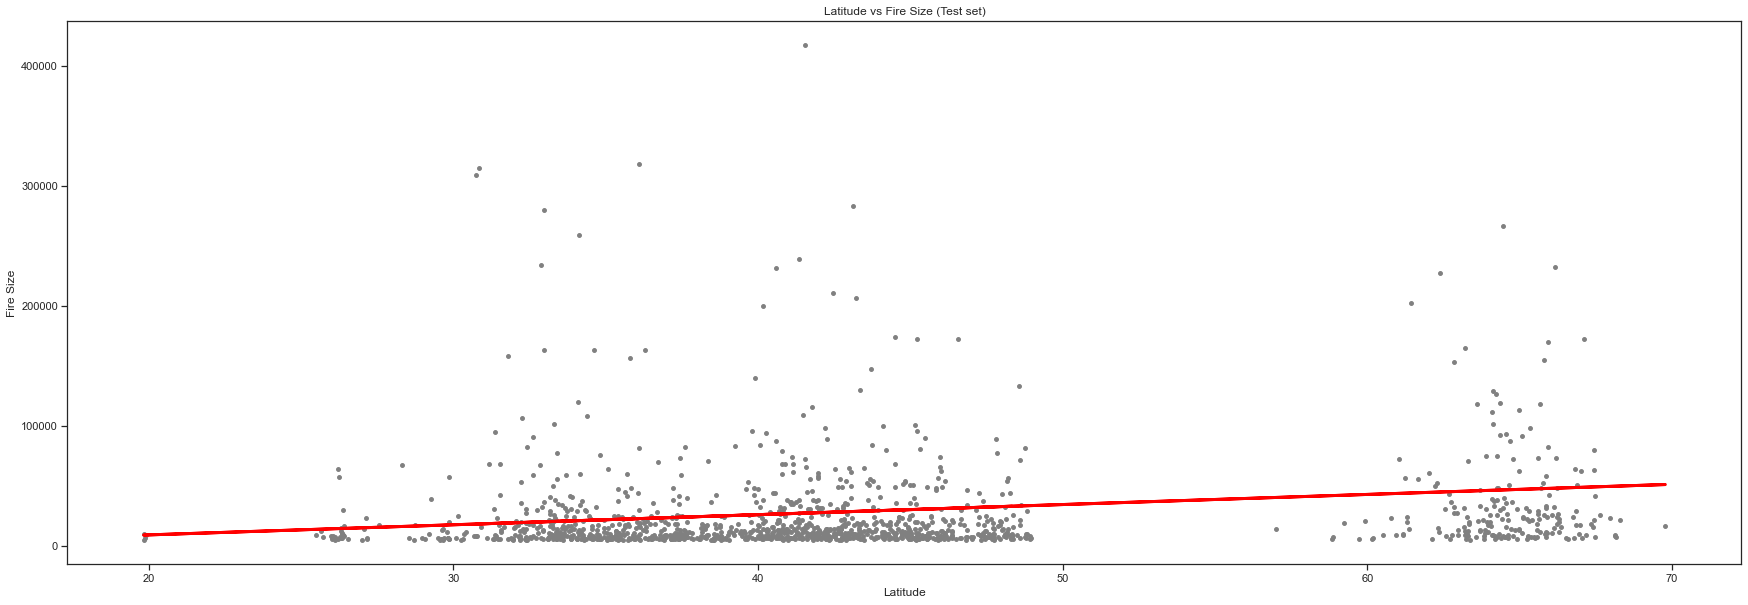

In [94]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Latitude vs Fire Size (Test set)')
plot_test.xlabel('Latitude')
plot_test.ylabel('Fire Size')
plot_test.show()

In [95]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [96]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[843.00925745]]
Mean squared error:  1431027139.0096502
R2 score:  -0.00939715572936306


In [97]:
y_predicted

array([[17991.05624559],
       [40119.17251569],
       [32427.35935133],
       ...,
       [25633.99734764],
       [22172.85423931],
       [32806.91021654]])

In [98]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,"8,382.0000","17,991.0562"
1,"14,100.0000","40,119.1725"
2,"16,105.0000","32,427.3594"
3,"23,398.5000","49,343.2955"
4,"8,296.0000","31,145.2828"
5,"5,500.0000","21,183.7641"
6,"37,597.3000","46,226.8589"
7,"7,165.0000","22,392.7954"
8,"5,441.0000","27,521.0455"
9,"19,090.0000","32,273.0325"


##### Compare how the regression fits the training set

In [99]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [100]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [101]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[843.00925745]]
Mean squared error:  2684721712.467679
R2 score:  0.029262203770415218


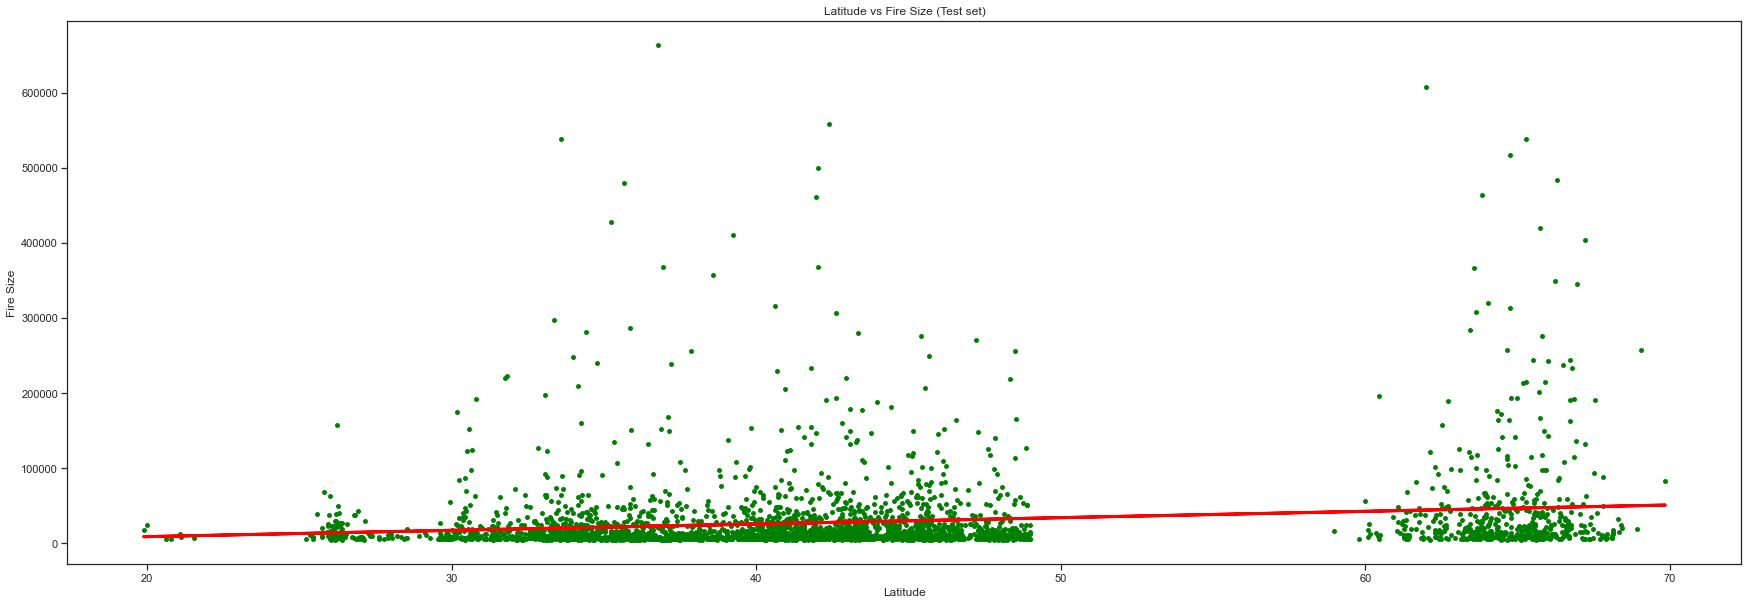

In [102]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Latitude vs Fire Size (Test set)')
plot_test.xlabel('Latitude')
plot_test.ylabel('Fire Size')
plot_test.show()

The observations have a very high difference between the actual and predicted values. The model's statistics results show that the linear regression model is not a good fit. I will re-run a model excluding outliers.

Although there appears to be more data points over the higher latitude degrees, there are many data points far from the line of best fit which would mean as above the linear regression model is not a good fit.

#### Performance improvement after removing outliers?

In [103]:
count = (df_large_fires['FIRE_SIZE'] > 5000).sum()
print(count)

4372


In [104]:
df_large_fires['FIRE_SIZE_CLASS'].value_counts(dropna=False)

G    4455
Name: FIRE_SIZE_CLASS, dtype: int64

In [105]:
# Removing largest size wildfires

df_test = df_large_fires[df_large_fires['FIRE_SIZE'] <=20000]

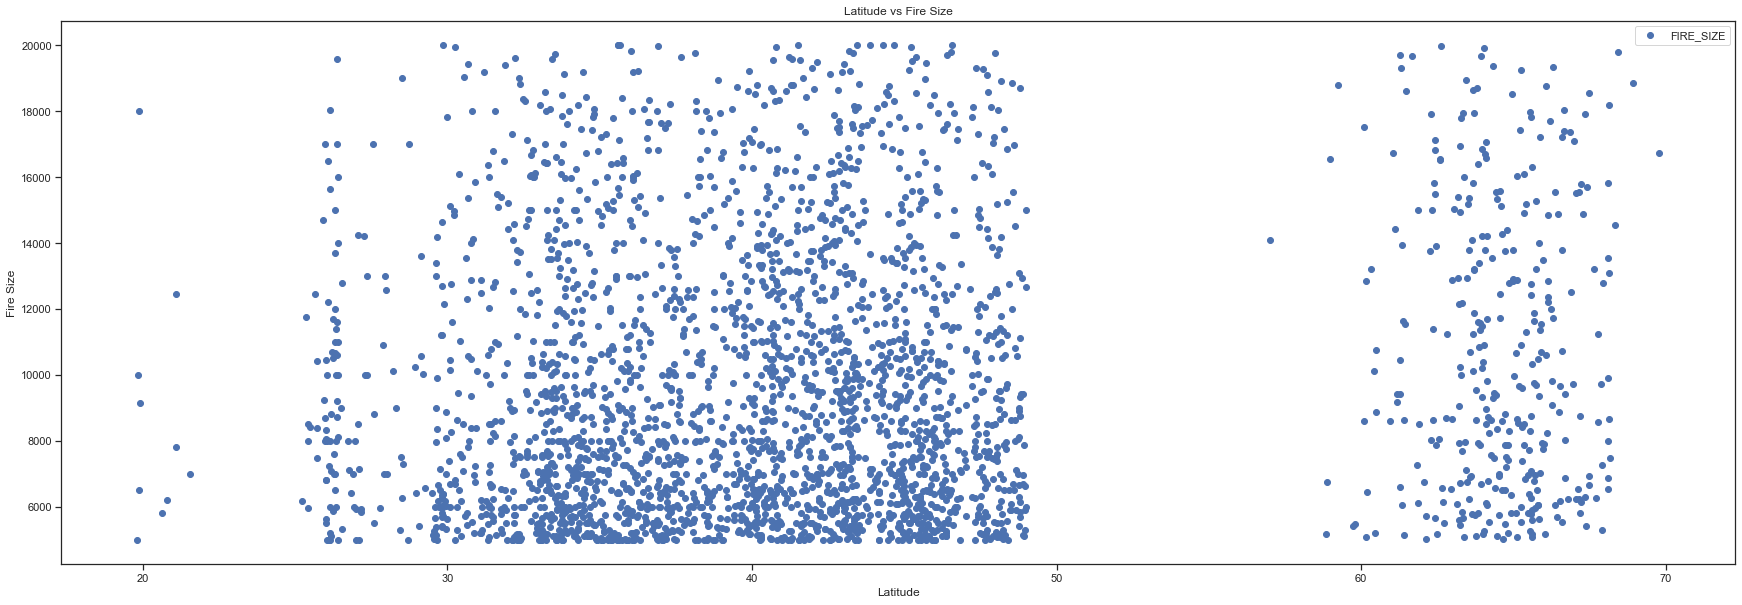

In [106]:
# Checking how the scatterplot looks without the outliers.

df_test.plot(x = 'LATITUDE', y='FIRE_SIZE', style='o')  
plt.title('Latitude vs Fire Size')  
plt.xlabel('Latitude')  
plt.ylabel('Fire Size')  
plt.show()

In [107]:
# Reshape again.

X_2 = df_test['LATITUDE'].values.reshape(-1,1)
y_2 = df_test['FIRE_SIZE'].values.reshape(-1,1)

In [108]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [109]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [110]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [111]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [112]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[28.3065503]]
Mean squared error:  17087495.02714468
R2 score:  0.01750932385602344


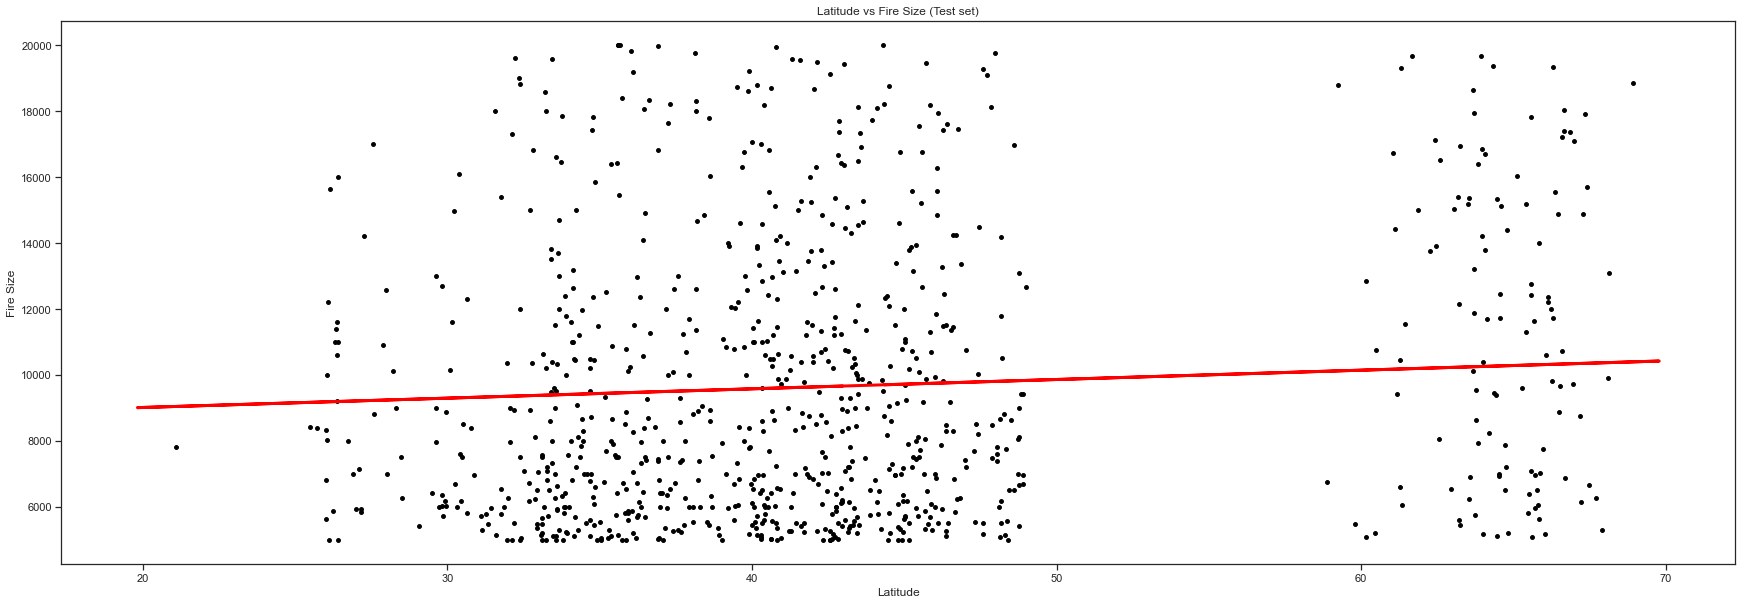

In [113]:
# Visualizing the test set results.

plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='black', s = 15)
plot_test.plot(X_train_2, regression.predict(X_train_2), color='red', linewidth =3)
plot_test.title('Latitude vs Fire Size (Test set)')
plot_test.xlabel('Latitude')
plot_test.ylabel('Fire Size')
plot_test.show()

In [114]:
#Export plot_test to .csv file

df_test.to_csv(os.path.join(path, '2. Data', 'b. Prepared Data', 'df_test.csv'))

In [115]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})

In [116]:
data.head(30)

,Actual,Predicted
0,"6,146.0000","9,691.9706"
1,"12,613.0000","9,524.2367"
2,"11,590.0000","9,297.0504"
3,"13,949.5000","9,728.7374"
4,"5,353.0000","9,495.1149"
5,"6,520.0000","10,276.2342"
6,"5,230.0000","9,509.9674"
7,"17,465.0000","9,767.6539"
8,"5,214.0000","9,673.3905"
9,"6,112.0000","9,576.7001"


Although the gap is now smaller, all observations still have a very high difference between the actual and predicted values. The model's statistics results show that the linear regression model is not a good fit.

### 7. Machine Learning

In [117]:
#Derive Disc_DOW_num using If-statement with the loc() function

df_large_fires.loc[df_large_fires['DISC_DOW'] == 'Monday', 'Disc_DOW_num'] = '1'
df_large_fires.loc[df_large_fires['DISC_DOW'] == 'Tuesday', 'Disc_DOW_num'] = '2'
df_large_fires.loc[df_large_fires['DISC_DOW'] == 'Wednesday', 'Disc_DOW_num'] = '3'
df_large_fires.loc[df_large_fires['DISC_DOW'] == 'Thursday', 'Disc_DOW_num'] = '4'
df_large_fires.loc[df_large_fires['DISC_DOW'] == 'Friday', 'Disc_DOW_num'] = '5'
df_large_fires.loc[df_large_fires['DISC_DOW'] == 'Saturday', 'Disc_DOW_num'] = '6'
df_large_fires.loc[df_large_fires['DISC_DOW'] == 'Sunday', 'Disc_DOW_num'] = '7'

/Users/faridchehraz/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/faridchehraz/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [118]:
#Change Disc_DOW_num to int64

df_large_fires['Disc_DOW_num'] = df_large_fires['Disc_DOW_num'].astype('int64')

/var/folders/vh/d2rsnjw92ql_ggn35h8q4vmr0000gn/T/ipykernel_12734/3139570033.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_large_fires['Disc_DOW_num'] = df_large_fires['Disc_DOW_num'].astype('int64')


In [119]:
df_large_fires_2 = df_large_fires[['FIRE_YEAR','DISCOVERY_DOY','FIRE_SIZE','LATITUDE','LONGITUDE','Disc_DOW_num']]

In [120]:
df_large_fires_2.dtypes

FIRE_YEAR          int64
DISCOVERY_DOY      int64
FIRE_SIZE        float64
LATITUDE         float64
LONGITUDE        float64
Disc_DOW_num       int64
dtype: object

Standardisation

In [121]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_large_fires_2)

#### Apply the elbow technique

In [122]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [123]:
score = [kmeans[i].fit(df_large_fires_2).score(df_large_fires_2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-10533636703683.623,
 -3660605378708.782,
 -1967281906495.7246,
 -1076579513860.9215,
 -677078536612.5012,
 -478503658559.3741,
 -360931187874.10614,
 -273747656872.25424,
 -224638141689.52847]

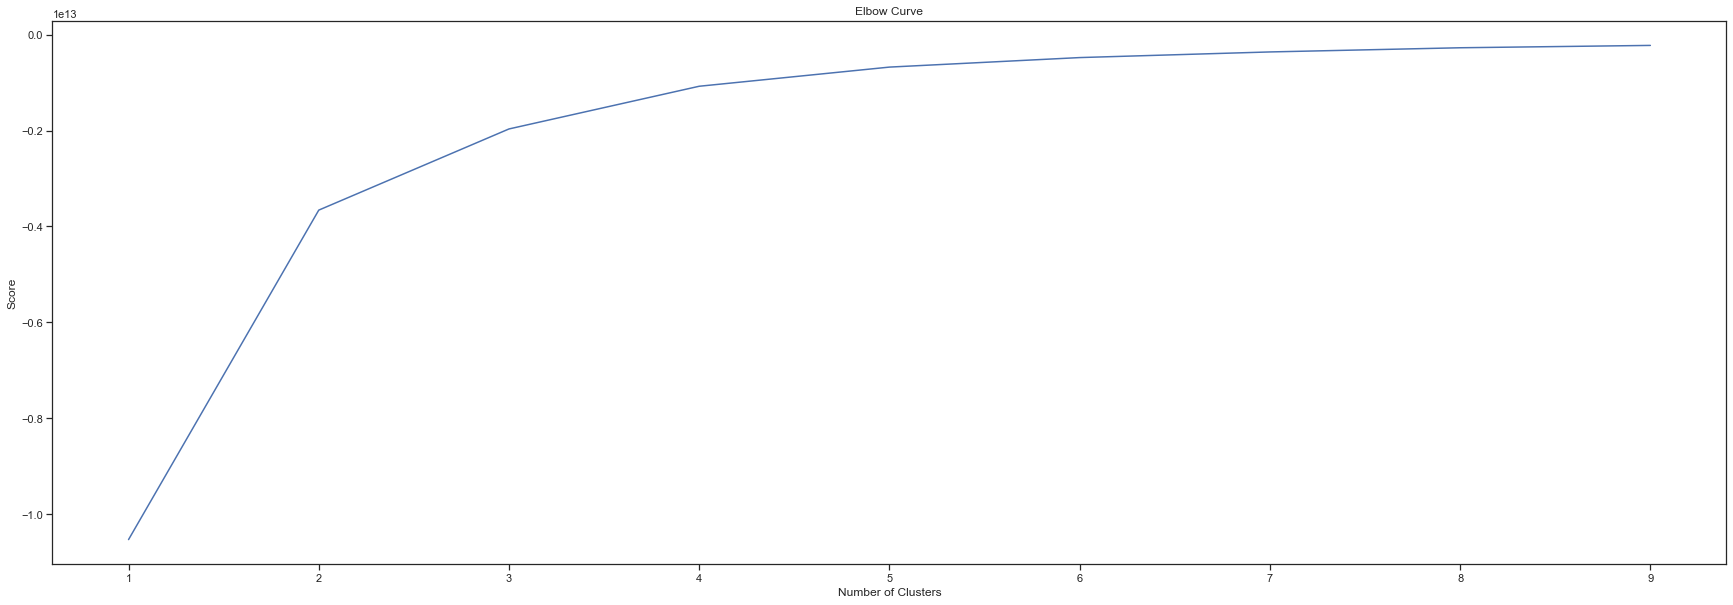

In [124]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

I have chosen to have four cluster as the line starts to level off at that point.

#### k-means clustering

In [125]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4, n_jobs = -1) 

In [126]:
# Fit the k-means object to the data.

kmeans.fit(df_large_fires_2)

/Users/faridchehraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [127]:
df_large_fires_2['clusters'] = kmeans.fit_predict(df_large_fires_2)

/Users/faridchehraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/var/folders/vh/d2rsnjw92ql_ggn35h8q4vmr0000gn/T/ipykernel_12734/832289656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_large_fires_2['clusters'] = kmeans.fit_predict(df_large_fires_2)


In [128]:
df_large_fires_2.head()

,FIRE_YEAR,DISCOVERY_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,Disc_DOW_num,clusters
16,2004,280,"16,823.0000",38.5233,-120.2117,3,0
17,2004,287,"7,700.0000",38.7800,-120.2600,3,0
188,2005,172,"16,100.0000",33.7233,-111.2750,2,0
1505,2005,149,"11,936.0000",33.6133,-108.5589,7,0
1588,2005,188,"11,357.0000",38.1697,-105.0381,4,0


In [129]:
df_large_fires_2['clusters'].value_counts()

0    3733
2     574
3     126
1      22
Name: clusters, dtype: int64

Text(0, 0.5, 'FIRE_SIZE')

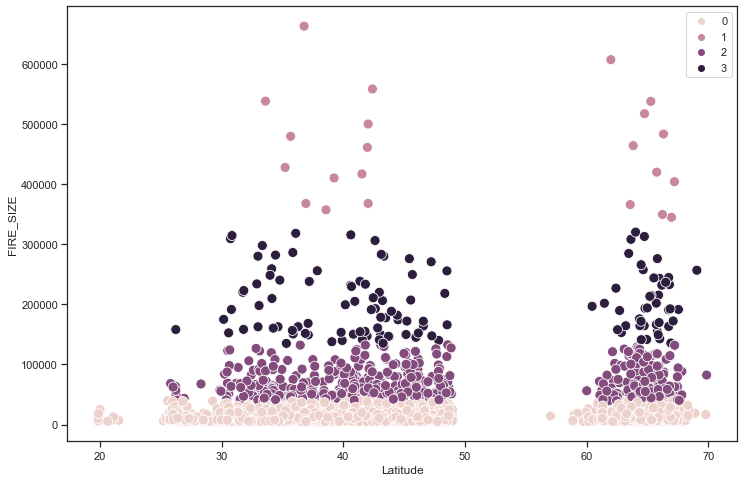

In [130]:
# Plot the clusters for the "Latitude" and "Fire size" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_large_fires_2['LATITUDE'], y=df_large_fires_2['FIRE_SIZE'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Latitude') # Label x-axis.
plt.ylabel('FIRE_SIZE') # Label y-axis.
##plt.show()

#### Observations taken from above scatterplot

- Unsure what the clusters are showing
- Although not easily visible until the final scattergraph, the gaps in data points depict the geography of the country.
- No wildfires > 5,000 at 20 degrees Latitude which is Hawaii
- Large number of wildfires in Alaska, between 60 and 70 degrees Latitude

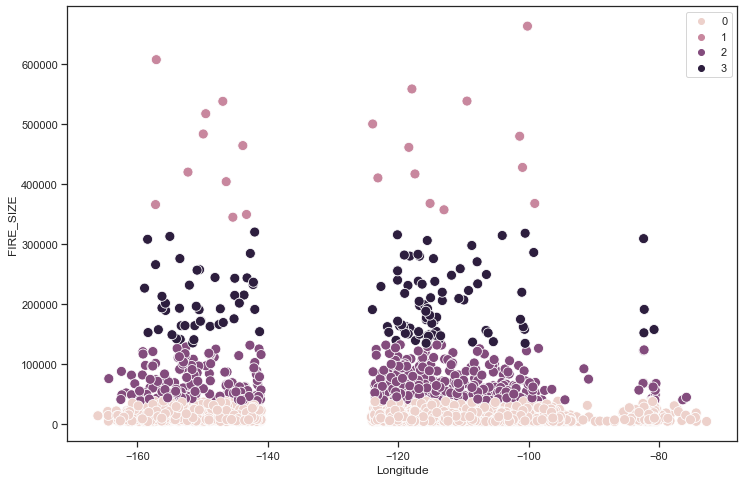

In [131]:
# Plot the clusters for the "Longitude" and "Fire size" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_large_fires_2['LONGITUDE'], y=df_large_fires_2['FIRE_SIZE'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Longitude') # Label x-axis.
plt.ylabel('FIRE_SIZE') # Label y-axis.
plt.show()

#### Observations taken from above scatterplot

- Unsure what the clusters are showing
- Although not easily visible until the final scattergraph, the gaps in data points depict the geography of the country.

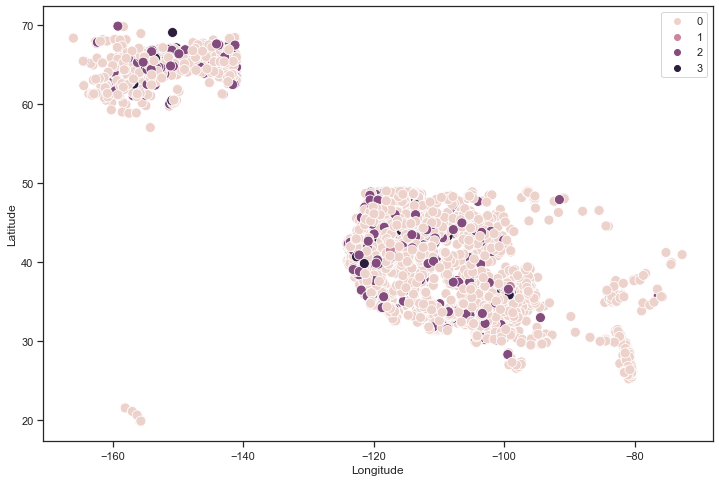

In [132]:
# Plot the clusters for the "Longitude" and "Latitude" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_large_fires_2['LONGITUDE'], y=df_large_fires_2['LATITUDE'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Longitude') # Label x-axis.
plt.ylabel('Latitude') # Label y-axis.
plt.show()

#### Observations taken from above scatterplot

- Clear visual depicting map of the USA although
- Clearly showing most large wildfres occur in the west of the country

In [133]:
df_large_fires_2.loc[df_large_fires_2['clusters'] == 3, 'cluster'] = 'Dark purple'
df_large_fires_2.loc[df_large_fires_2['clusters'] == 2, 'cluster'] = 'Purple'
df_large_fires_2.loc[df_large_fires_2['clusters'] == 1, 'cluster'] = 'Pink'
df_large_fires_2.loc[df_large_fires_2['clusters'] == 0, 'cluster'] = 'Salmon'

/Users/faridchehraz/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/faridchehraz/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [134]:
df_large_fires_2.head()

,FIRE_YEAR,DISCOVERY_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,Disc_DOW_num,clusters,cluster
16,2004,280,"16,823.0000",38.5233,-120.2117,3,0,Salmon
17,2004,287,"7,700.0000",38.7800,-120.2600,3,0,Salmon
188,2005,172,"16,100.0000",33.7233,-111.2750,2,0,Salmon
1505,2005,149,"11,936.0000",33.6133,-108.5589,7,0,Salmon
1588,2005,188,"11,357.0000",38.1697,-105.0381,4,0,Salmon


In [135]:
df_large_fires_2.groupby('cluster').agg({'DISCOVERY_DOY':['mean', 'median'], 
                         'FIRE_SIZE':['mean', 'median'], 
                         'LATITUDE':['mean', 'median'],
                          'LONGITUDE':['mean', 'median'],
                          'Disc_DOW_num':['mean', 'median']}).round(2)

DISCOVERY_DOY             FIRE_SIZE              LATITUDE          \
                     mean   median         mean       median     mean  median   
cluster                                                                         
Dark purple      185.3100 190.0000 201,272.7700 191,284.7000  48.5900 43.7500   
Pink             160.1800 170.5000 456,357.8800 444,371.5000  50.8100 42.2200   
Purple           189.6400 194.0000  65,737.6900  58,550.6500  46.9800 43.6500   
Salmon           187.7200 195.0000  13,167.9700  10,022.0000  42.5700 41.2300   

            LONGITUDE           Disc_DOW_num         
                 mean    median         mean median  
cluster                                              
Dark purple -125.6000 -118.3400       3.5300 3.0000  
Pink        -128.7000 -123.5100       5.1400 6.0000  
Purple      -123.0900 -117.9100       4.1300 4.0000  
Salmon      -115.5300 -114.4500       4.0200 4.0000

#### Observations taken from above statistics

- The 'Salmon' coloured cluster is clearly made up of the smallest wildfires. The high number could mean excluding this cluster and rerunning the scatterplots could show something on the largest sized wildfires.
- The mean and median 'Discovery day of year' show most wildfires ocurr during the warmer months of the year which is intuitive

In [136]:
#Export df_large_fires_2 to .csv file

df_large_fires_2.to_csv(os.path.join(path, '2. Data', 'b. Prepared Data', 'df_large_fires_2.csv'))